<a href="https://colab.research.google.com/github/psygrammer/about_python_dl_from_scrach_2/blob/main/notebooks/ch02/ch02_nlp_and_word_distributional_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. 자연어와 단어의 분산 표현

* 싸이그래머 / 어바웃파이썬 : 딥러닝 NLP [1]
* 김무성

--------------

# 차례 
* 2.1 자연어처리란
  - 2.1.1 단어의 의미
* 2.2 시소러스
  - 2.2.1 WordNet
  - 2.2.2 시소러스의 문제점
* 2.3 통계 기반 기법
  - 2.3.1 파이썬으로 말뭉치 전처리하기
  - 2.3.2 단어의 분산 표현
  - 2.3.3 분포 가설
  - 2.3.4 동시발생 행렬
  - 2.3.5 벡터 간 유사도
  - 2.3.6 유사 단어의 랭킹 표시
* 2.4 통계 기반 기법 개선하기
  - 2.4.1 상호정보량
  - 2.4.2 차원 감소
  - 2.4.3 SVD에 의한 차원 감소
  - 2.4.4 PTB 데이터셋
  - 2.4.5 PTB 데이터셋 평가
* 정리

------------

In [ ]:
!git clone https://github.com/psygrammer/about_python_dl_from_scrach_2.git

Cloning into 'about_python_dl_from_scrach_2'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 84 (delta 32), reused 34 (delta 5), pack-reused 0
Unpacking objects: 100% (84/84), done.


In [ ]:
ls

about_python_dl_from_scrach_2/  sample_data/


In [ ]:
cd /content/about_python_dl_from_scrach_2/notebooks/ch02

/content/about_python_dl_from_scrach_2/notebooks/ch02


In [ ]:
ls

ch02_nlp_and_word_distributional_representation.ipynb
ch02_nlp_and_word_distributional_representation_sol.ipynb


# 2.1 자연어처리란
* 2.1.1 단어의 의미

## 2.1.1 단어의 의미

------------

# 2.2 시소러스
* 2.2.1 WordNet
* 2.2.2 시소러스의 문제점


## 2.2.1 WordNet


## 2.2.2 시소러스의 문제점


--------------

# 2.3 통계 기반 기법
* 2.3.1 파이썬으로 말뭉치 전처리하기
* 2.3.2 단어의 분산 표현
* 2.3.3 분포 가설
* 2.3.4 동시발생 행렬
* 2.3.5 벡터 간 유사도
* 2.3.6 유사 단어의 랭킹 표시

 ## 2.3.1 파이썬으로 말뭉치 전처리하기
 

In [ ]:
text = 'You say goodbye and I say hello.'

In [ ]:
text = text.lower()
text

'you say goodbye and i say hello.'

In [ ]:
text = text.replace('.', ' .')
text

'you say goodbye and i say hello .'

In [ ]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
word_to_id = {}

In [ ]:
id_to_word = {}

In [ ]:
for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
id_to_word[1]

'say'

In [ ]:
word_to_id['hello']

5

In [ ]:
import numpy as np

In [ ]:
corpus = [word_to_id[w] for w in words]
corpus

[0, 1, 2, 3, 4, 1, 5, 6]

In [ ]:
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
# 지금까지의 처리들을 한 데 모아 하나의 함수로
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  
  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
# util.py 라는 파일을 만들어서 preprocess를 해당 파일로 분리해놓고 써보자
import util

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = util.preprocess(text)
print(corpus)
print(word_to_id)
print(id_to_word)

## 2.3.2 단어의 분산 표현
 

## 2.3.3 분포 가설
 

## 2.3.4 동시발생 행렬
 

In [ ]:
import numpy as np
from util import preprocess

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [ ]:
# 동시발생 행렬 예시
C = np.array([
  [0, 1, 0, 1, 0, 0, 0],
  [0, 0, 1, 0, 1, 0, 0],
  [0, 1, 0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 1, 0],              
], dtype=np.int32)

print(type(C))
print(C)

<class 'numpy.ndarray'>
[[0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [ ]:
# ID가 0인 단어의 벡터 표현
print(C[0])

[0 1 0 1 0 0 0]


In [ ]:
# ID가 4인 단어의 벡터 표현
print(C[4])

[0 0 0 0 0 1 0]


In [ ]:
# 'goodbye'의 벡터 표현
print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]


In [ ]:
# 말뭉치로부터 동시발생 행렬을 만들어주는 함수를 구현해보자.
# 그리고 util.py 파일에 함수 추가해주자.
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size+1):
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

  return co_matrix


In [ ]:
len(word_to_id)

7

In [ ]:
vocab_size = len(word_to_id)
co_matrix = create_co_matrix(corpus, vocab_size, window_size=1)

print(co_matrix)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


## 2.3.5 벡터 간 유사도

In [ ]:
# 코사인 유사도 함수 만들기 (그리고 util.py 파일에 추가)
def cos_similarity(x, y):
  pass


In [ ]:
C = create_co_matrix(corpus, vocab_size)
print(C)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(c0)
print(c1)

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]


## 2.3.6 유사 단어의 랭킹 표시


In [ ]:
# 유사 단어의 랭킹 표시 함수
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  # 검색어를 꺼낸다
  
  # 코사인 유사도 계산
  
  # 코사인 유사도를 기준으로 내림차순으로 출력
  

In [ ]:
most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067811865475
 i: 0.7071067811865475
 hello: 0.7071067811865475
 say: 0.0
 and: 0.0


----------------

# 2.4 통계 기반 기법 개선하기
* 2.4.1 상호정보량
* 2.4.2 차원 감소
* 2.4.3 SVD에 의한 차원 감소
* 2.4.4 PTB 데이터셋
* 2.4.5 PTB 데이터셋 평가


## 2.4.1 상호정보량


In [ ]:
import numpy as np 

def ppmi(C, verbose=False, eps=1e-8):
  pass

In [ ]:
ls ..

ch02/  common/


In [ ]:
import sys
sys.path.append("..")
from common.util import preprocess, create_co_matrix, cos_similarity

In [ ]:
text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

In [ ]:
W = ppmi(C)

In [ ]:
np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0]
 [1 0 1 0 1 1]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 1 0 1 0 0]
 [0 1 0 0 0 0]]
--------------------------------------------------
PPMI
[[0.    1.585 0.    0.    0.    0.   ]
 [1.585 0.    0.585 0.    0.585 1.585]
 [0.    0.585 0.    1.585 0.    0.   ]
 [0.    0.    1.585 0.    1.585 0.   ]
 [0.    0.585 0.    1.585 0.    0.   ]
 [0.    1.585 0.    0.    0.    0.   ]]


## 2.4.2 차원 감소


## 2.4.3 SVD에 의한 차원 감소


In [ ]:
import sys
sys.path.append("..")
from common.util import preprocess, create_co_matrix, ppmi

In [ ]:
text = 'You say goodbye and I say hello'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

In [ ]:
W = ppmi(C)

In [ ]:
# SVD
# 코드를 작성

In [ ]:
U

array([[-4.524e-01,  0.000e+00,  0.000e+00, -5.435e-01,  6.545e-01,
        -2.676e-01],
       [ 0.000e+00, -7.686e-01,  6.397e-01,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-5.435e-01,  1.824e-17,  4.565e-17,  4.524e-01,  2.676e-01,
         6.545e-01],
       [-5.551e-17, -6.397e-01, -7.686e-01,  0.000e+00,  0.000e+00,
         0.000e+00],
       [-5.435e-01,  1.824e-17,  4.565e-17,  4.524e-01, -2.676e-01,
        -6.545e-01],
       [-4.524e-01,  1.324e-17,  3.315e-17, -5.435e-01, -6.545e-01,
         2.676e-01]], dtype=float32)

In [ ]:
S

array([2.693e+00, 2.693e+00, 1.866e+00, 1.866e+00, 2.792e-17, 5.603e-33],
      dtype=float32)

In [ ]:
V

array([[ 1.559e-17, -7.686e-01, -4.705e-17, -6.397e-01, -4.705e-17,
         6.683e-17],
       [-4.524e-01,  0.000e+00, -5.435e-01,  0.000e+00, -5.435e-01,
        -4.524e-01],
       [ 5.435e-01,  8.327e-17, -4.524e-01,  0.000e+00, -4.524e-01,
         5.435e-01],
       [-1.489e-18, -6.397e-01,  3.380e-17,  7.686e-01, -2.171e-17,
         1.194e-17],
       [ 6.149e-17,  1.691e-16,  7.071e-01, -1.863e-16, -7.071e-01,
        -4.446e-17],
       [ 7.071e-01,  0.000e+00, -9.534e-17,  1.572e-17,  4.344e-17,
        -7.071e-01]], dtype=float32)

In [ ]:
print(C[0]) # 동시발생 행렬

[0 1 0 0 0 0]


In [ ]:
print(W[0]) # PPMI 행렬

[0.    1.585 0.    0.    0.    0.   ]


In [ ]:
print(U[0]) # SVD

[-0.452  0.     0.    -0.543  0.654 -0.268]


In [ ]:
# 2차원으로 축소시키기
# 코드를 작성

[-0.452  0.   ]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

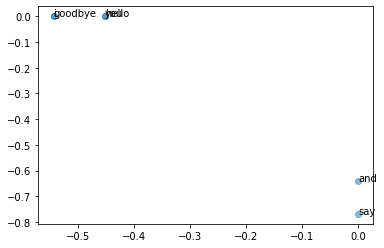

In [ ]:
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

## 2.4.4 PTB 데이터셋


In [ ]:
ls ../dataset

addition.txt  date.txt  __init__.py  ptb.py  sequence.py  spiral.py


In [ ]:
!cat ../dataset/ptb.py

# coding: utf-8
import sys
import os
sys.path.append('..')
try:
    import urllib.request
except ImportError:
    raise ImportError('Use Python3!')
import pickle
import numpy as np


url_base = 'https://raw.githubusercontent.com/tomsercu/lstm/master/data/'
key_file = {
    'train':'ptb.train.txt',
    'test':'ptb.test.txt',
    'valid':'ptb.valid.txt'
}
save_file = {
    'train':'ptb.train.npy',
    'test':'ptb.test.npy',
    'valid':'ptb.valid.npy'
}
vocab_file = 'ptb.vocab.pkl'

dataset_dir = os.path.dirname(os.path.abspath(__file__))


def _download(file_name):
    file_path = dataset_dir + '/' + file_name
    if os.path.exists(file_path):
        return

    print('Downloading ' + file_name + ' ... ')

    try:
        urllib.request.urlretrieve(url_base + file_name, file_path)
    except urllib.error.URLError:
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context
        urllib.request.urlretrieve(url_base + file_name, file_path)

    print(

In [ ]:
import sys
sys.path.append('..')
from dataset import ptb

In [ ]:
corpus, word_to_id, id_to_word = ptb.load_data('train')

Done


In [ ]:
# 코드를 작성

말뭉치 크기: 929589


In [ ]:
# 코드를 작성

corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [ ]:
# 코드를 작성

id_to_word[0]: aer


In [ ]:
# 코드를 작성

id_to_word[]: banknote


In [ ]:
# 코드를 작성

word_to_id['car']: 3856


In [ ]:
# 코드를 작성

word_to_id['happy']: 4428


In [ ]:
# 코드를 작성

word_to_id['lexus']: 7426


## 2.4.5 PTB 데이터셋 평가


In [ ]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

In [ ]:
window_size = # 코드를 작성
wordvec_size = # 코드를 작성

In [ ]:
# 코드를 작성

In [ ]:
print('동시발생 수 계산 ...')
# 코드를 작성

동시발생 수 계산 ...


In [ ]:
print('PPMI 계산 ...')
# 코드를 작성

PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료


In [ ]:
print('calculating SVD ...')
# 코드를 작성

calculating SVD ...


In [ ]:
# 코드를 작성

In [ ]:
word_vecs[0]

array([-4.878e-11,  8.036e-07,  1.977e-07, -6.902e-08,  2.044e-06,
        1.937e-06, -7.768e-07, -9.329e-07, -1.200e-06,  1.744e-06,
       -1.017e-06,  2.840e-06, -3.111e-06, -4.729e-06,  8.888e-07,
        3.770e-07,  3.825e-07,  6.785e-07, -1.623e-05,  5.062e-06,
        1.161e-05, -3.510e-06,  4.573e-06, -2.451e-05, -2.857e-05,
       -5.327e-06, -1.361e-05,  1.320e-05, -1.915e-05,  2.342e-05,
        2.753e-05,  1.870e-06,  1.148e-05, -2.145e-05, -7.307e-06,
        3.304e-05, -2.104e-06, -2.317e-05, -4.794e-05,  9.663e-06,
        1.052e-05, -2.070e-06, -4.457e-05, -4.021e-05,  4.287e-05,
        1.741e-05,  1.956e-05, -7.703e-06, -3.796e-05, -5.580e-05,
        1.811e-05,  9.822e-06,  9.681e-06, -4.744e-06,  3.343e-05,
       -5.850e-07, -5.899e-06,  1.273e-04,  2.015e-05, -4.058e-06,
        4.266e-05, -4.194e-05,  2.698e-05, -3.537e-05, -6.600e-05,
       -1.148e-04,  1.016e-04, -1.087e-04,  1.061e-06,  1.400e-04,
        1.429e-04,  1.373e-04, -8.503e-06,  4.929e-05, -7.413e

In [ ]:
querys = ['you', 'year', 'car', 'toyota']
# 코드를 작성


[query] you
 i: 0.7127096652984619
 we: 0.6640666127204895
 anybody: 0.6004209518432617
 've: 0.5345055460929871
 do: 0.5236090421676636

[query] year
 month: 0.7144228219985962
 quarter: 0.6580794453620911
 last: 0.5742595195770264
 earlier: 0.5721191763877869
 june: 0.5704035758972168

[query] car
 auto: 0.6365101933479309
 luxury: 0.5630237460136414
 domestic: 0.498928040266037
 midsized: 0.4982423484325409
 vehicle: 0.4813641607761383

[query] toyota
 motor: 0.7739945650100708
 nissan: 0.7060121297836304
 motors: 0.6407662630081177
 lexus: 0.6133679151535034
 honda: 0.6041578650474548


---------

# 정리

------------------
# 참고문헌
* [1] 밑바닥부터 시작하는 딥러닝 2
  - https://www.hanbit.co.kr/store/books/look.php?p_code=B8950212853
  - github - https://github.com/WegraLee/deep-learning-from-scratch-2